# UNIChro-seq Bidirectional Analysis Permutation Analysis

This notebook implements permutation tests to assess the statistical significance of allelic editing biases observed in the data. 

## Prepare Data and scripts

In [1]:
source("bidirectional_analysis.R")
source("permutation_analysis.R")

In [2]:
input_file <- "input_file.txt"
data <- read.table(input_file, header = TRUE, sep = "\t", stringsAsFactors = FALSE)
head(data)

,Donor,edit_direction,SNP,ref,alt,REF_count,ALT_count
,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>
1,S01,ALT_to_REF,rs35320439,3906,1444,126142,82049
2,S01,NON_EDIT,rs35320439,2830,1909,59753,74000
3,S01,REF_to_ALT,rs35320439,2209,4824,40315,121156
4,S02,ALT_to_REF,rs35320439,1877,914,127783,93972
5,S02,NON_EDIT,rs35320439,1767,1211,86939,96592
6,S02,REF_to_ALT,rs35320439,1183,2225,43846,114868


## Calculate original results

In [3]:
results <- run_analysis(data)
head(results)

,SNP,effect_type,Effect_size,SE,p_value
,<chr>,<chr>,<dbl>,<dbl>,<dbl>
(Intercept),rs35320439,caQTL,-0.3392374,0.04079598,9.139695e-17
toALT_edit_bias,rs35320439,toALT_edit_bias,0.1057663,0.01837542,8.620100e-09


## permutation results

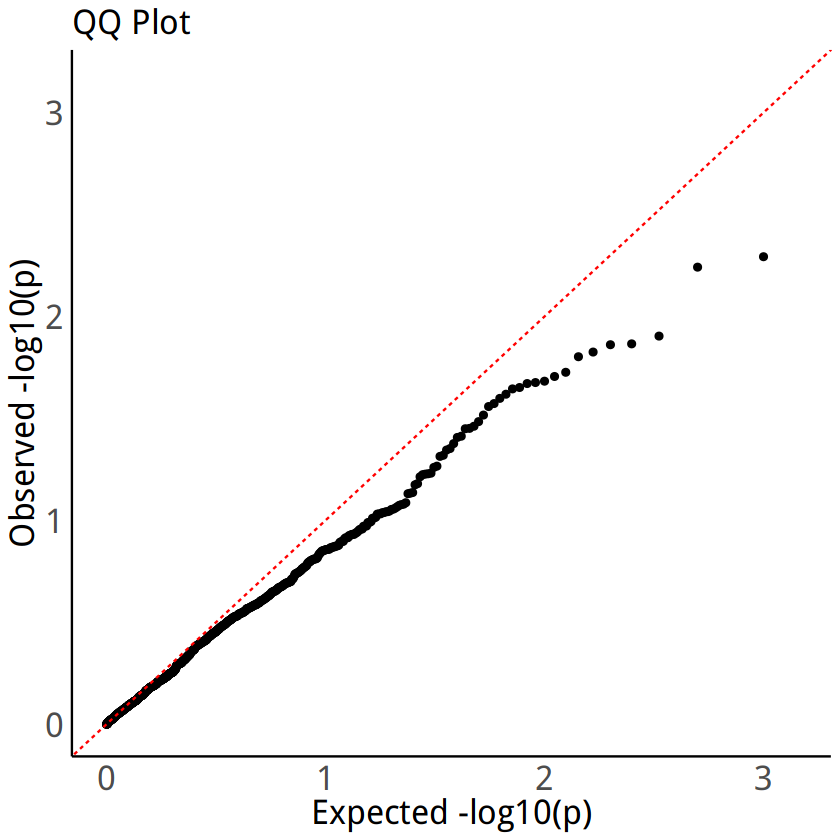

In [4]:
perm_results <- run_permutation(data, n_permutations = 1000, seed = 123)

p<-plot_qq(perm_results$p_value[perm_results$effect == "toALT_edit_bias"])
plot(p)

In [5]:
sessionInfo()

R version 4.1.3 (2022-03-10)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Red Hat Enterprise Linux 8.8 (Ootpa)

Matrix products: default
BLAS/LAPACK: /rshare1/ZETTAI_path_WA_slash_home_KARA/home/ha7477/tools/miniconda3/envs/de/lib/libopenblasp-r0.3.21.so

locale:
 [1] LC_CTYPE=ja_JP.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=ja_JP.UTF-8        LC_COLLATE=ja_JP.UTF-8    
 [5] LC_MONETARY=ja_JP.UTF-8    LC_MESSAGES=ja_JP.UTF-8   
 [7] LC_PAPER=ja_JP.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=ja_JP.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] ggplot2_3.5.1  lmerTest_3.1-3 lme4_1.1-35.4  Matrix_1.6-5   tidyr_1.3.1   
[6] dplyr_1.1.4   

loaded via a namespace (and not attached):
 [1] Rcpp_1.0.12         nloptr_1.2.2.3      pillar_1.9.0       
 [4] compiler_4.1.3      base64enc_0.1